# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [44]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Rene\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


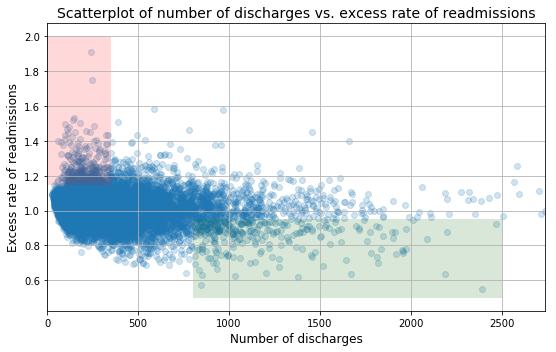

In [66]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='darkgreen', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
# B1, setup an appropriate hypothesis test.
# Group A: hospitals/facilities with number of discharges < 100
# Group B: hospitals/facilities with number of discharges > 1000

# Null hypothesis H0: there is no difference in excess readmission rates between group A and group B
# Alt. hypothesis H1: there is a difference in excess readmission rates between group A and group B

In [46]:
df = clean_hospital_read_df
len(df[df['Number of Discharges'] == 0])

81

In [47]:
# Some values appear to be null:
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [48]:
# Remove rows with null values:
df = df.dropna(subset=['Excess Readmission Ratio'])
# Check again:
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [50]:
# Create a population per group (number of discharges < 100 resp. number of discharges > 1000)
df_100 = df[df['Number of Discharges']<100]
df_1000 = df[df['Number of Discharges']>1000]

In [53]:
# Check whether CLT (Central Limit Theorem) applies.
# In order for CLT to apply:
# - the population size should be "large" enough
# - the population should resemble a normal distribution; n*p >= 10 and n*(1-p) >=10
# n_100 = population size for number of discharges < 100
# p_100 = probabilty for number of discharges < 100
# n_1000 = population size for number of discharges > 1000
# p_1000 = probabilty for number of discharges > 1000
n_100 = len(df_100)
n_1000 = len(df_1000)
print(n_100)
print(n_1000)
# Hence population sizes are large enough
p_100 = len(df_100[df_100['Excess Readmission Ratio']>1])/len(df_100)
p_1000 = len(df_1000[df_1000['Excess Readmission Ratio']>1])/len(df_1000)
print(p_100)
print(p_1000)
print(n_100*p_100)
print(n_100*(1-p_100))
print(n_1000*p_1000)
print(n_1000*(1-p_1000))
#Hence population resemble a normal distribution

1188
463
0.6321548821548821
0.4449244060475162
751.0
437.0
206.0
257.0


In [52]:
# B2, compute and report the observed significance value (or p-value).
# A Z-test seems appropriate
# Calculate mean mean, standard deviation std and standard error SE per population:
# Hospitals/facilities with number of discharges < 100:
mean_100 = df_100['Excess Readmission Ratio'].mean()
sdv_100 = df_100['Excess Readmission Ratio'].std()
SE_100 = stats.sem(df_100['Excess Readmission Ratio'])
# Hospitals/facilities with number of discharges > 1000:
mean_1000 = df_1000['Excess Readmission Ratio'].mean()
sdv_1000 = df_1000['Excess Readmission Ratio'].std()
SE_1000 = stats.sem(df_1000['Excess Readmission Ratio'])
print(mean_100)
print(sdv_100)
print(SE_100)
print(mean_1000)
print(sdv_1000)
print(SE_1000)

1.0226183501683506
0.05797860323426279
0.0016821298911
0.9783354211663071
0.12000735348224047
0.00557721469338


In [37]:
# Calculate standard error over both populations:
SE = np.sqrt((np.square(sdv_100)/len(df_100))+(np.square(sdv_1000)/len(df_1000)))
# If we assume 95 percent reliability, the confidence interval is:
ME = 1.96 * SE
# CI = (w_mean - b_mean - ME, w_mean - b_mean+ ME)
ME

0.011417716632014768

In [40]:
#Calculate p-value P:
Z = (mean_1000 - mean_100)/SE
P = stats.norm.sf(abs(Z))*2
P

2.9216983678099894e-14

In [ ]:
# B3, report statistical significance for αα = .01
# Probability turns out to be much smaller than a significance level of 0.01
# Hence we can reject our null hypothesis.
# There seems to be a difference in excess readmission rates between hospitals/facilities with number of discharges < 100 and
# hospitals/facilities with number of discharges > 1000

In [58]:
# Correlation coefficient formulas are used to find how strong a relationship is between data. 
# The formulas return a value between -1 and 1, where:

#    1 indicates a strong positive relationship.
#    -1 indicates a strong negative relationship.
#    A result of zero indicates no relationship at all.

# Lets's have a look at the correlation for the original population (after deleting null values) 
# and the populations based on number of discharges:
corr_orig = df[['Number of Discharges','Excess Readmission Ratio']].corr()
corr_100 = df_100[['Number of Discharges','Excess Readmission Ratio']].corr()
corr_1000 = df_1000[['Number of Discharges','Excess Readmission Ratio']].corr()

print(corr_orig)
print(corr_100)
print(corr_1000)

# None of above correlations indicate a strong relationship between number of discharges and excess readmissions
# There seems to be a weak relationship for hospitals/facilities with less then 100 discharges, 
# however as it's weak it's likely that other factors rather then excess readmission play a role

                          Number of Discharges  Excess Readmission Ratio
Number of Discharges                  1.000000                 -0.097398
Excess Readmission Ratio             -0.097398                  1.000000
                          Number of Discharges  Excess Readmission Ratio
Number of Discharges                  1.000000                 -0.244636
Excess Readmission Ratio             -0.244636                  1.000000
                          Number of Discharges  Excess Readmission Ratio
Number of Discharges                  1.000000                 -0.079277
Excess Readmission Ratio             -0.079277                  1.000000


In [ ]:
# B4, discuss statistical significance and practical significance.
# Practical (or clinical) significance asks the larger question about differences:
# “Are the differences between samples big enough to have real meaning.”
# Looking at mean, std and SE it doesn't seem that differences are that significant to have real meaning
# Looking at coorelations only fortifies this impression

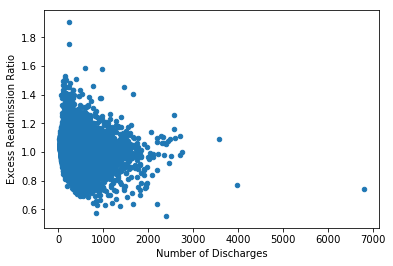

In [77]:
# B5, Look at the scatterplot above.
# 1) What are the advantages and disadvantages of using this plot to convey information?
#    The plot is an easy visualization hence easy to publish to and understand by any kind of audience
#    The plot doesn't really "tell a story" and can easily be misused (to "push"  a preferred approach) and misinterpreted 
#    There seems to be quite some variance and the plot does not show clear correlations.
# 2) Construct another plot that conveys the same information in a more direct manner.
df.plot(x='Number of Discharges', y='Excess Readmission Ratio', kind = 'scatter')

In [85]:
# Percentage per measure:
df['Measure Name'].replace(['READM-30-AMI-HRRP','READM-30-COPD-HRRP','READM-30-HF-HRRP','READM-30-HIP-KNEE-HRRP','READM-30-PN-HRRP'], ['Heart attack','COPD','Heart failure','Hip knee replacement','Pneumonia']).value_counts()/len(df)*100

Heart failure           24.641211
Pneumonia               24.258502
COPD                    23.719231
Heart attack            15.456206
Hip knee replacement    11.924850
Name: Measure Name, dtype: float64

# Conclusions / recommendations


## A. Initial observations based on the plot above

Indeed, the rate of readmissions seems to be trending down with increasing number of discharges.
However, there seems to be no strong correlation between number of discharges and readmissions. 

## B. Statistics

Calculating mean and probability per population is in agreeance with the results stated under **B. Statistics**

* In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess
  readmission rate greater than 1
* In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess
  readmission rate greater than 1

## C. Conclusions

No significant correlation between hospital capacity (number of discharges) and readmission rates was found.
Hence it is not said that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

## D. Regulatory policy recommendations

Based on the results of the analysis, there are no indications that smaller sized hospitals underperform.
Actually, it could be that smaller hospitals overperform when taking into account other facts like number of specialized resources, budget, physical location (rural/metropole), actual focus of the hospital/facility (first care versus specialized like academic hospitals).

Furthermore, a split between discharges < 100 and discharges > 1000 seems arbitrary.
It seems more logical to find correlations over either all discharges or over populations that succeed each other.
Other factors should be considered first.

The definitions of "discharge" and "readmission" are not stated.
A discharge for a smaller hospital might for instance be related to the fact that specialists are only on-site during a specific period (like the last week of the month). So a smaller hospital might do all necessary and possible prework, discharge the patient and readmit when the specialist is on-site.
This likely applies to less urgent measures like hip/knee replacements, which make up for 12 precent of all measures.
In other words, local/rural hospitals function/serve in a different way than bigger non-rural hospitals.

One recommendation I'd make for sure is to set up a "hospital improvement committee".
Such a committee could liaise between hospitals that seem to have a higher readmission rate and similar hospitals. (as in similar sized, similar procedures offered, similar physical location, similar types of patient groups like elderly).
Intention would be to trigger a learning curve, hospitals might be able to lower their readmission rates by making small simple (procedural) adjustments.